# Example: Step counting

In this example, you are given a number of sample sensor logs and you are asked to write an algorithm to count the number of steps. The different logs correspond to different sensor placements (left pocket, right pocket, wrist), and to different walking patterns (e.g. with delays between short burst of steps). The title of each log says how many steps are present; try to get reasonably close to this number.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
from scipy.signal import find_peaks
import glob
import re
matplotlib.style.use('ggplot')
%matplotlib inline

## Using find_peaks to Detect Steps

The `find_peaks` function from scipy.signal can be used to detect peaks and valleys in timeseries data. Some key parameters that are relevant to your assignment:

- `height`: Specifies the minimum height of peaks. This can be a threshold to avoid detecting peaks that result from minor movements or noise.

- `prominence`: Defines the prominence of a peak, which is the height of the peak relative to the highest contour line surrounding it that does not contain a higher peak. A higher prominence helps avoid false detections from noise.

- `distance`: Minimum horizontal distance (in number of data points) between peaks. It can be used to avoid detecting too many peaks in a short span of time.

When detecting steps from accelerometer data:

- `height` and `prominence` can be tuned to ensure the steps detected are genuine and not just minor jitters or noise in the data.

- `distance` can be adjusted based on an understanding of human walking patterns. For instance, a distance corresponding to the sampling rate would mean that peaks less than one second apart would be ignored. This is because it's unlikely for genuine steps in regular walking to occur less than one second apart.

Tuning these parameters is crucial for accurately detecting steps without too many false positives or false negatives.



In [2]:
files = glob.glob('data/Steps-Logs/*.csv')
for f in files:
    print(f)

data/Steps-Logs/D8_righthoodiepocket.csv
data/Steps-Logs/D2_leftwrist_slow.csv
data/Steps-Logs/D3_leftwrist.csv
data/Steps-Logs/D9_rightpocket_slow.csv
data/Steps-Logs/D6_leftwrist3_slow.csv
data/Steps-Logs/D5_leftwrist2_slow.csv
data/Steps-Logs/D1_lefthoodiepocket.csv
data/Steps-Logs/D4_leftwrist_3hops_3halfspin_3touchceiling_thenshake.csv
data/Steps-Logs/D7_righthoodiepocket_slow.csv


In [3]:
files = glob.glob('data/Steps-Logs/*.csv')

SAMPLING_RATE = 50.0  # sample rate, Hz
results = []

# set height, prominence and distance parameters
ht = 10000
prom = 0.1
dist = SAMPLING_RATE/2  # Corresponds to two steps per second, assuming it's unlikely for a person to take more than two steps every second.

for f in files:

    # Load data
    df = pd.read_csv(f, index_col='time', parse_dates=True)  
    
    # Detect peaks
    peaks, _ = find_peaks(df['accel_mag'], height=ht, prominence=prom, distance=dist)
    num_steps = len(peaks)
    
    # Parse filename to extract ID
    match = re.search(r'D(\d+)', f)
    id = match.group(1)
    
    # Get ground truth
    actual_steps = 45
        
    # Calculate accuracy       
    accuracy = num_steps/actual_steps*100
    
    # Store results 
    results.append([id, actual_steps, num_steps, accuracy])
    
# Print table   
print("{:>10}  {:>10}  {:>10}  {:>10}".format('ID', 'Actual', 'Detected', 'Accuracy'))
for row in results:
    print("{:>10}  {:>10}  {:>10}  {:>10.2f}".format(*row))

        ID      Actual    Detected    Accuracy
         8          45          73      162.22
         2          45          25       55.56
         3          45          59      131.11
         9          45          27       60.00
         6          45          25       55.56
         5          45          34       75.56
         1          45          84      186.67
         4          45         201      446.67
         7          45          22       48.89


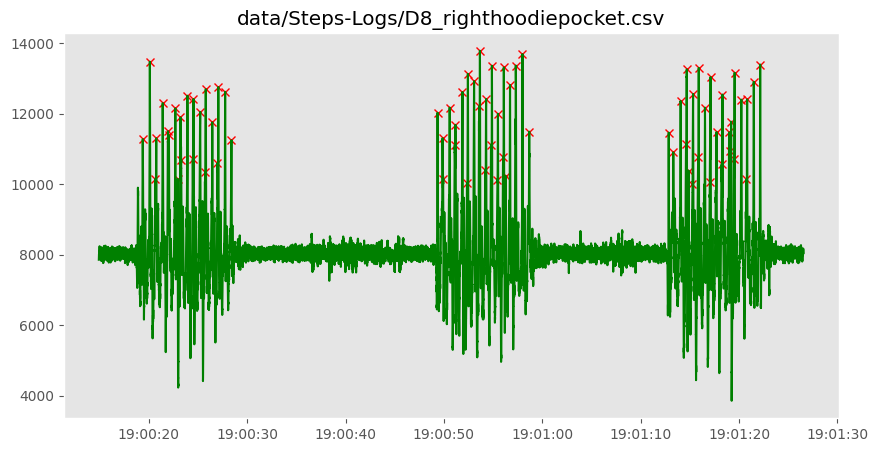

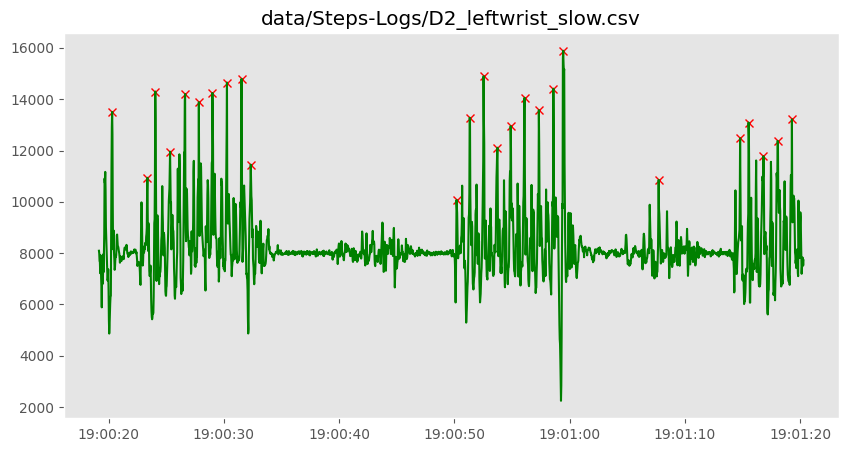

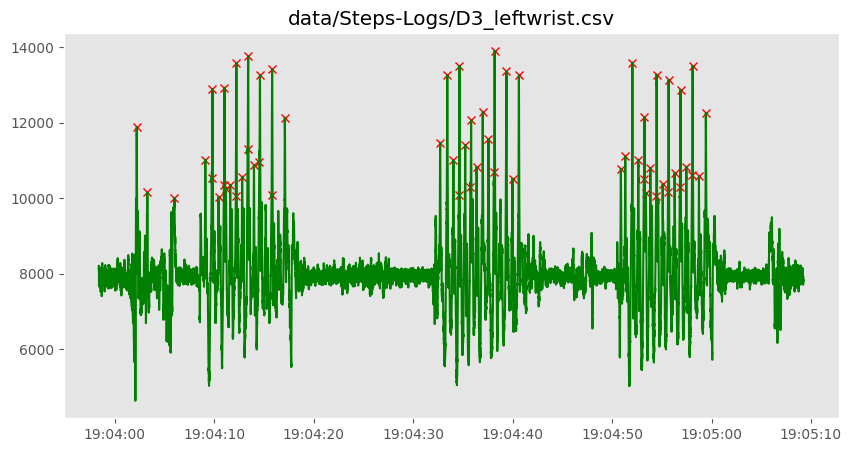

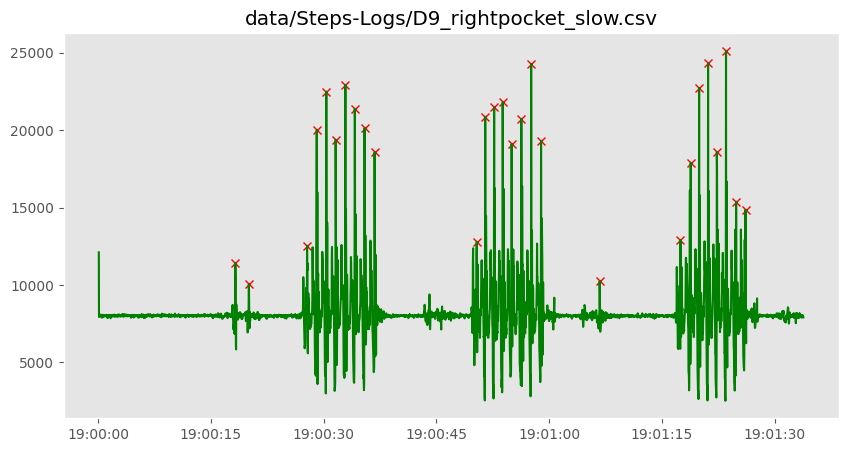

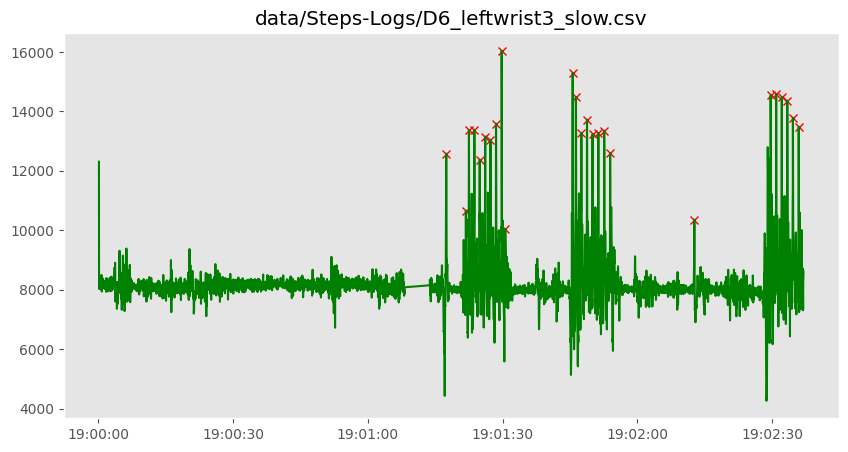

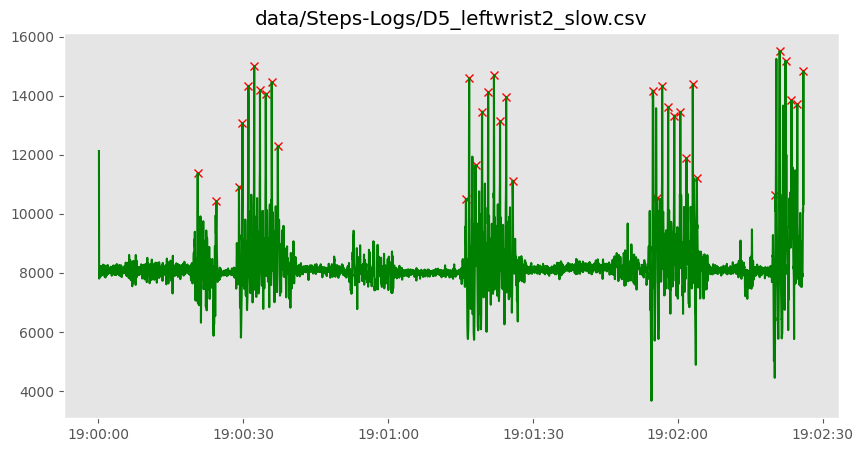

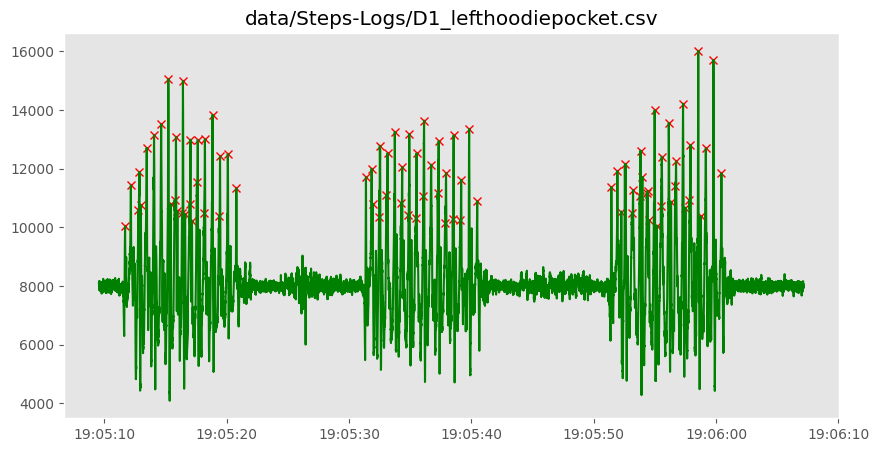

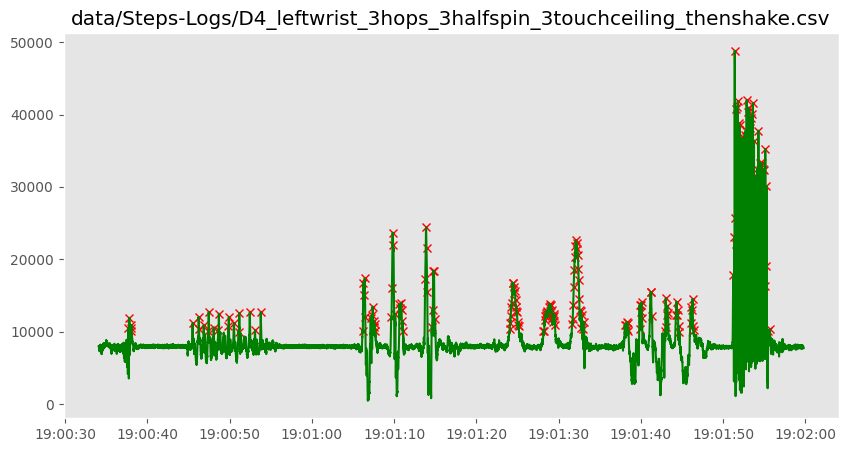

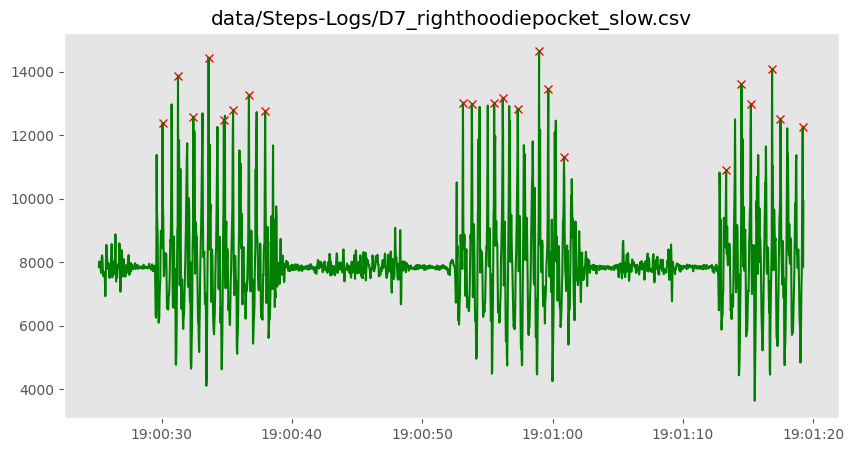

In [4]:
# Load data and detect peaks
files_to_plot = glob.glob('data/Steps-Logs/D*.csv')

for i, f in enumerate(files_to_plot):
    df = pd.read_csv(f, index_col='time', parse_dates=True)  
    
    # Step counting algorithm
    peaks_indices = find_peaks(df['accel_mag'], height=ht, prominence=prom, distance=dist)[0]
    peaks = df['accel_mag'][peaks_indices]

    # Plot the signal and mark the points where your algorithm detects steps
    plt.figure(figsize=(10,5))

    time_axis = df.index[peaks_indices]

    pl.plot(time_axis, peaks, 'rx')
    pl.plot(df.index, df['accel_mag'], 'g-', label = 'filtered')
    plt.title(f)
    plt.grid()
    plt.show()
